In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [2]:
rc('font',family='Comic Sans MS')

In [3]:
def Z(omega,R,C,L):
    Z = R + 1j*(omega*L - (1/omega*C))
    return Z
def Z_sq(omega,R,C,L):
    ZZ = R**2 + (omega*L - (1/omega*C))**2
    return ZZ

In [4]:
#Szeregowy układ
Cze33 = pd.read_csv(f"./Dane/BodeSimulator33.txt",sep=r'\s*', skiprows=3, header=None, decimal=',')
Cze130 = pd.read_csv(f"./Dane/BodeSimulator130.txt",sep=r'\s*', skiprows=3, header=None, decimal=',')
Cze130.columns = ["Elv_Freq(Hz)","Elv_Gain(dB)","Elv_Phase(deg)","Sym_Freq(Hz)","Sym_Gain(dB)","Sym_Phase(deg)"]
Cze33.columns = ["Elv_Freq(Hz)","Elv_Gain(dB)","Elv_Phase(deg)","Sym_Freq(Hz)","Sym_Gain(dB)","Sym_Phase(deg)"]
Cze33['Elv_Freq(kHz)'] = Cze33['Elv_Freq(Hz)'] / 1e3
Cze130['Elv_Freq(kHz)'] = Cze130['Elv_Freq(Hz)'] / 1e3
Cze33['Elv_Gain'] = np.exp(Cze33['Elv_Gain(dB)'] / 20)
Cze130['Elv_Gain'] = np.exp(Cze130['Elv_Gain(dB)'] / 20)
Cze33['Sym_Freq(kHz)'] = Cze33['Sym_Freq(Hz)'] / 1e3
Cze130['Sym_Freq(kHz)'] = Cze130['Sym_Freq(Hz)'] / 1e3
Cze33['Sym_Gain'] = np.exp(Cze33['Sym_Gain(dB)'] / 20)
Cze130['Sym_Gain'] = np.exp(Cze130['Sym_Gain(dB)'] / 20)

/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/paulina/.anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate fr

In [5]:
omega_0_33 = Cze33[Cze33['Elv_Gain(dB)'] == max(Cze33['Elv_Gain(dB)'])]
omega_0_130 = Cze130[Cze130['Elv_Gain(dB)'] == max(Cze130['Elv_Gain(dB)'])]
Omega_0 = (float(omega_0_33['Elv_Freq(Hz)']) + float(omega_0_130['Elv_Freq(Hz)'])) / 2
Omega_0

11884.98

In [71]:
C = 10e-9
L = 181e-3
R = 33
U = 1

Szerokość połówkowa: 711.5 Hz
Dobroć: 0.03491


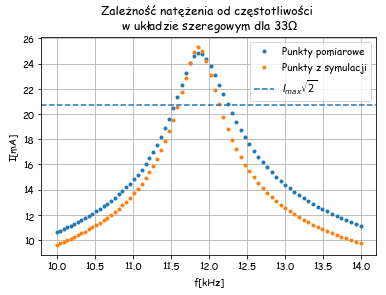

In [72]:
Cze33['Elv_I(mA)'] = (U*Cze33['Elv_Gain']/Z(Cze33['Elv_Freq(Hz)'],R,L,C)).real * 1e3 #W mA
Cze33['Sym_I(mA)'] = (U*Cze33['Sym_Gain']/Z(Cze33['Sym_Freq(Hz)'],R,L,C)).real * 1e3 #w mA
wysokosc_poluwkowa_33 = (max(Cze33['Elv_I(mA)'])-min(Cze33['Elv_I(mA)']))/np.sqrt(2) + min(Cze33['Elv_I(mA)'])
punkty_połowkowe_33 = Cze33.loc[[31,44]]
szerokosc_poluwkowa_33 = punkty_połowkowe_33.loc[44,'Elv_Freq(Hz)'] - punkty_połowkowe_33.loc[31,'Elv_Freq(Hz)']
dobroc_33 = max(Cze33['Elv_I(mA)'])/szerokosc_poluwkowa_33
plt.plot(Cze33['Elv_Freq(kHz)'],Cze33['Elv_I(mA)'],'.',label = 'Punkty pomiarowe')
plt.plot(Cze33['Sym_Freq(kHz)'],Cze33['Sym_I(mA)'],'.',label = 'Punkty z symulacji')
plt.axhline(wysokosc_poluwkowa_33,ls = 'dashed',label='$I_{max}\sqrt{2}$')
plt.xlabel('f[kHz]')
plt.ylabel('I[mA]')
plt.grid()
plt.title('Zależność natężenia od częstotliwości \n w układzie szeregowym dla 33$\Omega$')
plt.legend()
plt.savefig('Bode33.png',dpi=400)
print(f"Szerokość połówkowa: {szerokosc_poluwkowa_33:.4} Hz")
print(f"Dobroć: {dobroc_33:.4}")

Szerokość połówkowa: 1207.6 Hz
Dobroć: 0.02362


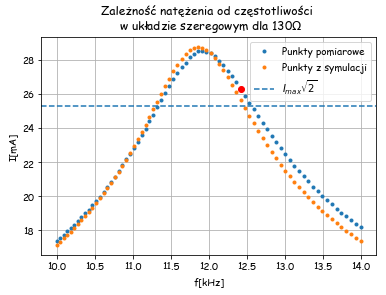

In [73]:
Cze130['Elv_I(mA)'] = (U*Cze130['Elv_Gain']/Z(Cze130['Elv_Freq(Hz)'],R,L,C)).real * 1e3 #W mA
Cze130['Sym_I(mA)'] = (U*Cze130['Sym_Gain']/Z(Cze130['Sym_Freq(Hz)'],R,L,C)).real * 1e3 #w mA
wysokosc_poluwkowa_130 = (max(Cze130['Elv_I(mA)'])-min(Cze130['Elv_I(mA)']))/np.sqrt(2) + min(Cze130['Elv_I(mA)'])
punkty_połowkowe_130 = Cze130.loc[[27,49]]
szerokosc_poluwkowa_130 = punkty_połowkowe_130.loc[49,'Elv_Freq(Hz)'] - punkty_połowkowe_130.loc[27,'Elv_Freq(Hz)']
dobroc_130 = max(Cze130['Elv_I(mA)'])/szerokosc_poluwkowa_130
plt.plot(Cze130['Elv_Freq(kHz)'],Cze130['Elv_I(mA)'],'.',label = 'Punkty pomiarowe')
plt.plot(Cze130['Sym_Freq(kHz)'],Cze130['Sym_I(mA)'],'.',label = 'Punkty z symulacji')
plt.axhline(wysokosc_poluwkowa_130,ls = 'dashed',label='$I_{max}\sqrt{2}$')
plt.plot(Cze130.loc[i,'Elv_Freq(kHz)'],Cze130.loc[i,'Elv_I(mA)'],'ro')
plt.xlabel('f[kHz]')
plt.ylabel('I[mA]')
plt.grid()
plt.legend()
plt.title('Zależność natężenia od częstotliwości \n w układzie szeregowym dla 130$\Omega$')
plt.savefig('Bode130.png',dpi=400)
print(f"Szerokość połówkowa: {szerokosc_poluwkowa_130:.5} Hz")
print(f"Dobroć: {dobroc_130:.4}")